<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/gradient-boosting/EDA/Housing_prices_kaggle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for housing prices

In [229]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 80)

In [3]:
raw_df_train = pd.read_csv('https://raw.githubusercontent.com/Dimildizio/DS_course/main/gradient-boosting/data/train.csv', index_col=0)
raw_df_test = pd.read_csv('https://raw.githubusercontent.com/Dimildizio/DS_course/main/gradient-boosting/data/test.csv', index_col=0)


In [4]:
raw_df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
len(raw_df_train.columns)

80

In [6]:
raw_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
raw_df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [8]:
raw_df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
raw_df_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [93]:
raw_df_train.select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Creating a function to convert objects and numericals into faster dtypes

In [11]:
def improve_cats(dataframe) -> pd.DataFrame:
  df = dataframe.copy()
  for col in df.columns:
    if df[col].dtype == 'int64':
      df[col] = df[col].astype('int32')
    elif df[col].dtype == 'float64':
      df[col] = df[col].astype('float32')
    elif df[col].dtype == 'object':
      df[col] = df[col].astype('category')
    else:
      print('Unknown data type')
      return
  return df

In [12]:
df = improve_cats(raw_df_train) #pd.concat([df_train_1, df_test_1])
df_test = improve_cats(raw_df_test)

In [13]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [155]:
print(f"Num of duplicates: {df.duplicated().sum()}")

Num of duplicates: 0


No duplicates

# Lets take a look at NaNs, zeros, None, Null, np.nan

In [15]:
for col in df.columns:
  print(f'{col}: {df[col].isna().sum()}')

MSSubClass: 0
MSZoning: 0
LotFrontage: 259
LotArea: 0
Street: 0
Alley: 1369
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 8
MasVnrArea: 8
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageCars: 0
GarageArea: 0
GarageQual: 81
GarageCond: 81
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 

In [16]:
def plot_nas(df):
  plt.figure(figsize = (12,8))
  nulls = df.isnull().sum()
  nulls = nulls[nulls > 0]
  nulls.sort_values(inplace=True)
  nulls.plot.barh()
  plt.show()  

In [17]:
def get_nan_cols(df):
  mt = []
  for col in df.columns:
    nans = df[col].isna().sum()
    if nans > 0:
      print(f"{col}:\n{nans}/{df[col].notna().sum()} = {int(nans/1460*100)}%\n")
      mt.append(col)

In [18]:
def get_cats(df, col):
  cats = df[col].value_counts()
  print(cats)
  print('NaNs', df[col].isna().sum())

# Train dataset NaNs

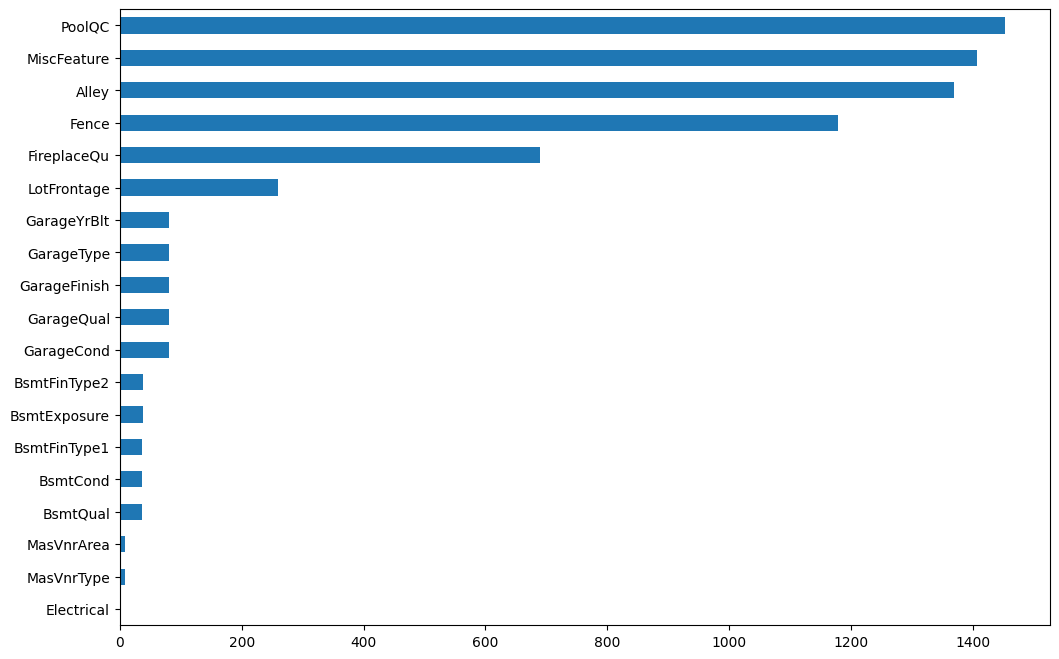

In [19]:
plot_nas(df)

In [20]:
train_nan_cols = get_nan_cols(df)

LotFrontage:
259/1201 = 17%

Alley:
1369/91 = 93%

MasVnrType:
8/1452 = 0%

MasVnrArea:
8/1452 = 0%

BsmtQual:
37/1423 = 2%

BsmtCond:
37/1423 = 2%

BsmtExposure:
38/1422 = 2%

BsmtFinType1:
37/1423 = 2%

BsmtFinType2:
38/1422 = 2%

Electrical:
1/1459 = 0%

FireplaceQu:
690/770 = 47%

GarageType:
81/1379 = 5%

GarageYrBlt:
81/1379 = 5%

GarageFinish:
81/1379 = 5%

GarageQual:
81/1379 = 5%

GarageCond:
81/1379 = 5%

PoolQC:
1453/7 = 99%

Fence:
1179/281 = 80%

MiscFeature:
1406/54 = 96%



*Italic categories mean they are not in ***test*** dataset*

##The following cols have more NaNs than values


**Alley** - Grvl (50), Pave (41), NaN (1369) - better substitute NaNs with "**MISSING**" or **drop col**

**FireplaceQu**- Gd (380), TA (313), Fa (33), Ex (24), Po (20) Nan (690) - fill with **MISSING**

**Fence** - MnPrv (157), GdPrv (59), GdWo (54), MnWw (11), NaN (1179) - **Choose** strategy ??? 

**PoolQC** - Gd (3), Ex (2), Fa(2) NaN (1453) - **drop col** category ?

**MiscFeature** - Shed (49), Gar2 (2), Othr (2) **TenC** (1), NaN (1406) - **drop col** category ?


## The rest of the parameters

**LotFrontage** has 17% NaNs. is numeric - strategy ???

**Garage** 81 vals: GarageCond, GarageFinish, GarageYrBlt all got NaNs at the **same** **indexes**.  
Possible collinearity of notnull but need to explore more. **GarageYrBlt** is numeric. Cond and Finish - category.
**GarageQual** has **Ex** cat that is not in test dataset. possibly drop

**Same** with **Bsmt**: Cond,Exposure, Qual, FinType1, FinType2 - fill with **MISSING**. all values are of category dtype

**Same** with **MasVnrArea** & **MasVnrType** - fill values?? Area - numeric, Type - category

**Electrical** - one nan categorical value. Convert to something else?


In [21]:
df[~df['PoolQC'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


# Test dataset NaNs

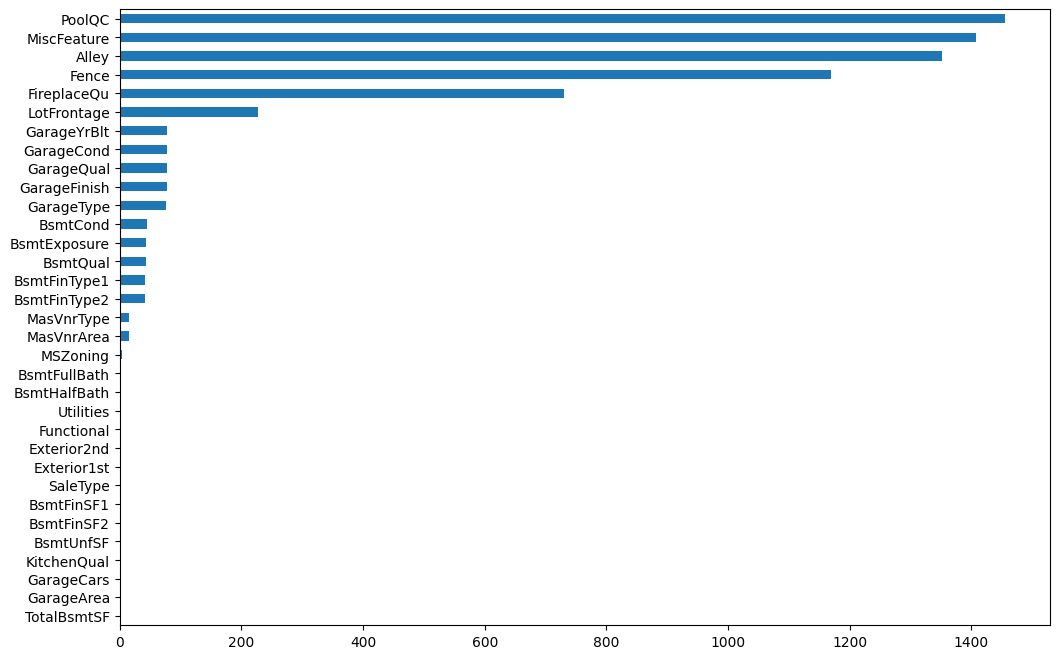

In [22]:
for x in [df_test]:
  plot_nas(x)

*Italic categories mean they are in the ***train*** dataset*

## The following categories have more than 50% NaNs

**PoolQC** - Ex (2), Gd (1), NaN - 1456 

**MiscFeature** - Shed (46), Gar2 (3), Othr (2), NaNs - 1408

**Alley** - Grvl (70), Pave (37), NaN - 1352

**Fence** - MnPrv (172), GdPrv (59), GdWo (58), MnWw (1), NaNs - 1169

**FireplaceQu** - Gd (364), TA (279), Fa (41), Po (26), Ex (19), NaNs - 730

## The rest of the parameters

**GarageType** - Attchd (853), Detchd (392), BuiltIn (98), 2 Types (17), Basment (17), Carport (6), NaNs (76) - unlike test, train dataset has no NaNs in this columns

**Garage YrBlt, Finish, Cond, Qual** - all have 78 same NaN indexes. Qual has no *Ex* value that is in train data. YrBlt is numeric.

**GarageCars** numetic (could be cat) train (0-4), test (0-5 +1NaN) **Drop NaN or median?**

**Bsmt** FinType1, FinType2, Qual, Cond, Exposure categories 

FinSF1, FinSF2, UnfSF, TotalBsmtSF, numeric (all got 1 NaN - same id2121)


**BsmtFullBath** (values from 0 to 3 + NaNs) and **BsmtHalfBath**(values from 0 to 2 + NaNs), numeric but could be categories (values from 0 to 3 + NaNs), could set NaN=3 and NaN=4.

**MSZoning** - RL(1114), RM (242), FV (74), C (all) (15), RH (10), NaN (4) - fill with **MISSING**

**LotFrontage** - numeric. 259 NaNs 110 nuniques

**Utilities** - got 2 nans, train has 1 value NoSeWa, all other (1457 and 1459) - AllPub - **Drop column**

**Exterior1st**, **Exterior2nd** - all got 1 NaN, and less uniques than in train

**MasVnrType** - categorical
**MasVnrArea** - numeric

**KitchenQual** 1 NaN cat

**Functional** 2 NaNs cat

**SaleType** 1 NaN cat



**WARNING**: there are cat values in train datasets that are absent in test and vice versa. (GarageQual "Ex" (in train) and GarageCars "5.0" (in test).

In [23]:
get_cats(df_test, 'GarageCars')

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64
NaNs 1


In [24]:
test_nan_cols =get_nan_cols(df_test)

MSZoning:
4/1455 = 0%

LotFrontage:
227/1232 = 15%

Alley:
1352/107 = 92%

Utilities:
2/1457 = 0%

Exterior1st:
1/1458 = 0%

Exterior2nd:
1/1458 = 0%

MasVnrType:
16/1443 = 1%

MasVnrArea:
15/1444 = 1%

BsmtQual:
44/1415 = 3%

BsmtCond:
45/1414 = 3%

BsmtExposure:
44/1415 = 3%

BsmtFinType1:
42/1417 = 2%

BsmtFinSF1:
1/1458 = 0%

BsmtFinType2:
42/1417 = 2%

BsmtFinSF2:
1/1458 = 0%

BsmtUnfSF:
1/1458 = 0%

TotalBsmtSF:
1/1458 = 0%

BsmtFullBath:
2/1457 = 0%

BsmtHalfBath:
2/1457 = 0%

KitchenQual:
1/1458 = 0%

Functional:
2/1457 = 0%

FireplaceQu:
730/729 = 50%

GarageType:
76/1383 = 5%

GarageYrBlt:
78/1381 = 5%

GarageFinish:
78/1381 = 5%

GarageCars:
1/1458 = 0%

GarageArea:
1/1458 = 0%

GarageQual:
78/1381 = 5%

GarageCond:
78/1381 = 5%

PoolQC:
1456/3 = 99%

Fence:
1169/290 = 80%

MiscFeature:
1408/51 = 96%

SaleType:
1/1458 = 0%



In [25]:
#df_test_1[df_test_1['BsmtFinSF1'].isna() & df_test_1['BsmtFinSF2'].isna() & df_test_1['BsmtUnfSF'].isna() & df_test_1['TotalBsmtSF'].isna()]

Lets make a fancy table with NaNs and the percentage

In [26]:
def create_nan_df(df, name='train'):
  dfnas = df.isna().sum().sort_values(ascending=False)
  dfnas = dfnas[dfnas > 0]
  dfnas_perc = (dfnas/df.shape[0])
  new_df= pd.concat([dfnas, dfnas_perc], axis=1, keys = [name+' NaNs', name +' %'])
  return new_df

In [27]:
trainnans = create_nan_df(df)
testnans = create_nan_df(df_test,'test')
pd.concat([trainnans, testnans], axis=1).reindex(columns = ['train NaNs', 'test NaNs', 'train %', 'test %'])

,train NaNs,test NaNs,train %,test %
PoolQC,1453.0,1456.0,0.995205,0.997944
MiscFeature,1406.0,1408.0,0.963014,0.965045
Alley,1369.0,1352.0,0.937671,0.926662
Fence,1179.0,1169.0,0.807534,0.801234
FireplaceQu,690.0,730.0,0.472603,0.500343
LotFrontage,259.0,227.0,0.177397,0.155586
GarageYrBlt,81.0,78.0,0.055479,0.053461
GarageCond,81.0,78.0,0.055479,0.053461
GarageType,81.0,76.0,0.055479,0.052090
GarageFinish,81.0,78.0,0.055479,0.053461


# Drop data

Drop LowQualFinSF,PoolArea, MiscVal

Drop OpenPorch or combine with other porches

In [28]:
for col in df.columns:
  if df[col].dtype != 'category':
    print(col,'more than zero', df[df[col] > 0].shape[0])

MSSubClass more than zero 1460
LotFrontage more than zero 1201
LotArea more than zero 1460
OverallQual more than zero 1460
OverallCond more than zero 1460
YearBuilt more than zero 1460
YearRemodAdd more than zero 1460
MasVnrArea more than zero 591
BsmtFinSF1 more than zero 993
BsmtFinSF2 more than zero 167
BsmtUnfSF more than zero 1342
TotalBsmtSF more than zero 1423
1stFlrSF more than zero 1460
2ndFlrSF more than zero 631
LowQualFinSF more than zero 26
GrLivArea more than zero 1460
BsmtFullBath more than zero 604
BsmtHalfBath more than zero 82
FullBath more than zero 1451
HalfBath more than zero 547
BedroomAbvGr more than zero 1454
KitchenAbvGr more than zero 1459
TotRmsAbvGrd more than zero 1460
Fireplaces more than zero 770
GarageYrBlt more than zero 1379
GarageCars more than zero 1379
GarageArea more than zero 1379
WoodDeckSF more than zero 699
OpenPorchSF more than zero 804
EnclosedPorch more than zero 208
3SsnPorch more than zero 24
ScreenPorch more than zero 116
PoolArea more th

In [331]:
#drop rows with a small num of nulls

def drop_low_zeros(df, cols):
  new_df = df.copy()
  for col in cols:
    new_df = new_df[new_df[col] > 0]
  return new_df

**IF** we need to remove outliers here is a function

In [239]:
def remove_iqr_outliers(df, param, mult = 1.5, minimum = True):
  n = df[param].describe()
  iqr = mult * (n['75%'] - n['25%'])
  d_max = n['50%']+iqr
  df_iqr = df[df[param] <= d_max]
  if minimum:
    d_min = n['50%']-iqr
    df_iqr = df[df[param] >= d_min]
  print(df_iqr.shape)
  return df_iqr

In [265]:
def cut_iqr(df, col, mult):
  d=df[col].describe()
  val =(d['50%'] + (d['75%']-d['25%'])) * mult
  return df[df[col] <= val]

In [240]:
def check_iqr_graph(df, iqr=1.5, param='SalePrice'):
  iqr_df = remove_iqr_outliers(df, param,iqr)
  print("Skewness: %f" % iqr_df[param].skew())
  print("Kurtosis: %f" % iqr_df[param].kurt())
  sns.boxplot(y = iqr_df[param])
  plt.figure(figsize=(10, 4))
  sns.histplot(iqr_df[param])
  #displot is very fpefpl
  sns.displot(iqr_df[param])
  #sns.scatterplot(df, y = df['SalePrice'], x = df[param])
  plt.show()

## Dropping NUMERIC values

### Basement 

total basement = sum of fin1 fin2 + unfinished

In [409]:
df['TotalBsmtSF'].sum() - df['BsmtFinSF1'].sum() - df['BsmtFinSF2'].sum() - df['BsmtUnfSF'].sum()

0

In [308]:
#we should leave 0s in garageX since thats houses withour garage
#df[df['GarageCars']==0]['GarageCars'].shape

In [470]:
df_num = df.copy()
#Create a new parameter that combines all porches
df_num['PorchSF'] = df_num['OpenPorchSF'] + df_num['EnclosedPorch'] + df_num['3SsnPorch'] + df_num['ScreenPorch']

#drop low numbers 
cols = ['KitchenAbvGr', 'BedroomAbvGr']
df_num = drop_low_zeros(df_num, cols)

#Drop numeric columns
df_num = df_num.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']) #drop proches
df_num = df_num.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])                    #drop basements
df_num = df_num.drop(columns=['GarageCars'])                                               #drop garage
df_num = df_num.drop(columns=['LowQualFinSF', 'PoolArea', 'MiscVal', 'TotRmsAbvGrd'])      #drop misc

to_log = ['LotFrontage', 'LotArea', '1stFlrSF','GrLivArea', 'SalePrice']
for col in to_log:
  df_num[col] = np.log(df_num[col])

df_num.shape

(1453, 69)

## Cut 3 IQR

(1134, 69)

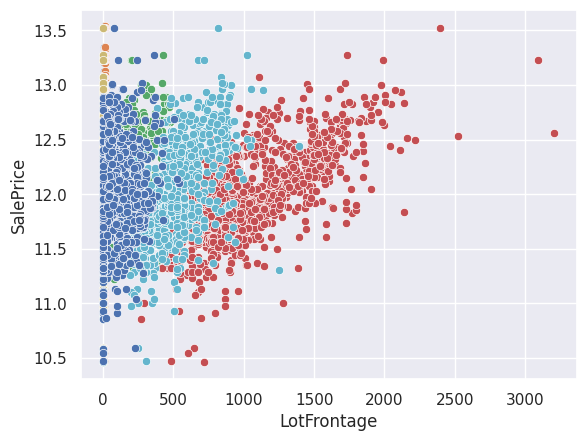

In [471]:
#Cut iqr
df_iqr = df_num.copy()
for col in ['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', \
            'TotalBsmtSF', '1stFlrSF', 'GrLivArea', \
            'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'PorchSF']:

    df_iqr = cut_iqr(df_iqr, col, 3)
    if col != 'SalePrice':
      sns.scatterplot(y = df_iqr['SalePrice'], x = df_iqr[col])

df_iqr.shape

(1009, 74)

## Cut years to 1 + year - minimum_year

not sure if we need to do it at all

In [271]:
def cut_year(df, year_cols):
  for year_col in year_cols:
    m = df[year_col].min()-1
    df[year_col] = df[year_col].apply(lambda x: x-m)
    return df

#not sure if we need to cut years
#cut_year(df2, ["YearBuilt", "YearRemodAdd",  'GarageYrBlt'])

##Transform Data

In [289]:
def check_skewkur(df,param):
  sns.distplot(df[param], fit=stats.norm)
  fig = plt.figure(figsize = (4,3))
  res = stats.probplot(df[param], plot=plt)


In [411]:
#check_skewkur(df_iqr, 'SalePrice')

In [427]:
for col in df_num.columns:
  if df_num[col].dtype != 'category':
    print(col)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
Fireplaces
GarageYrBlt
GarageArea
WoodDeckSF
MoSold
YrSold
SalePrice
PorchSF


Data is skewed to the right (most values are on the left) and has positive kurtosis (the peak is high)

ZEROS 454 




<ipython-input-289-18a25939d302>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], fit=stats.norm)


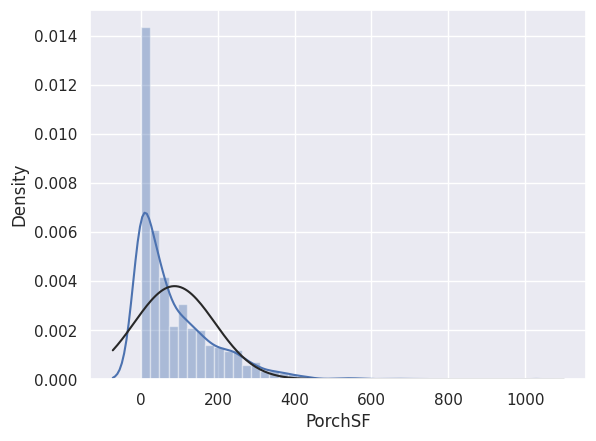

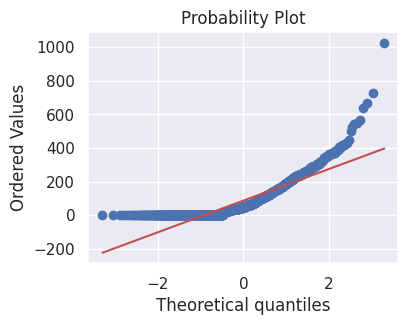

In [446]:
col = 'PorchSF'
ok = ['LotFrontage', 'LotArea', '1stFlrSF','GrLivArea', 'SalePrice']
manyzeros = ['MasVnrArea','BsmtFinSF2', '2ndFlrSF', 'PorchSF']
to_cut = {'LotArea': '50000'}
def check_log(col):
  df_iqr1 = df_num.copy()
  df_iqr1[col] = np.log(df_iqr1[col])
  check_skewkur(df_iqr1, col)
print('ZEROS',(df_num[col]<1).sum(),'\n\n')
check_skewkur(df_num, col)
#check_log(col)

In [456]:
#Create pairplots
def plotpair(df):
  numeric_cols = df.drop(['SalePrice'],axis=1).select_dtypes(include='number').columns
  colsets = [numeric_cols[i:i+5] for i in range(0, len(numeric_cols), 5)]
  for colset in colsets:
    grid = sns.PairGrid(df, y_vars=['SalePrice'], x_vars=colset, height=3, aspect=1.5)
    grid.map(sns.scatterplot)

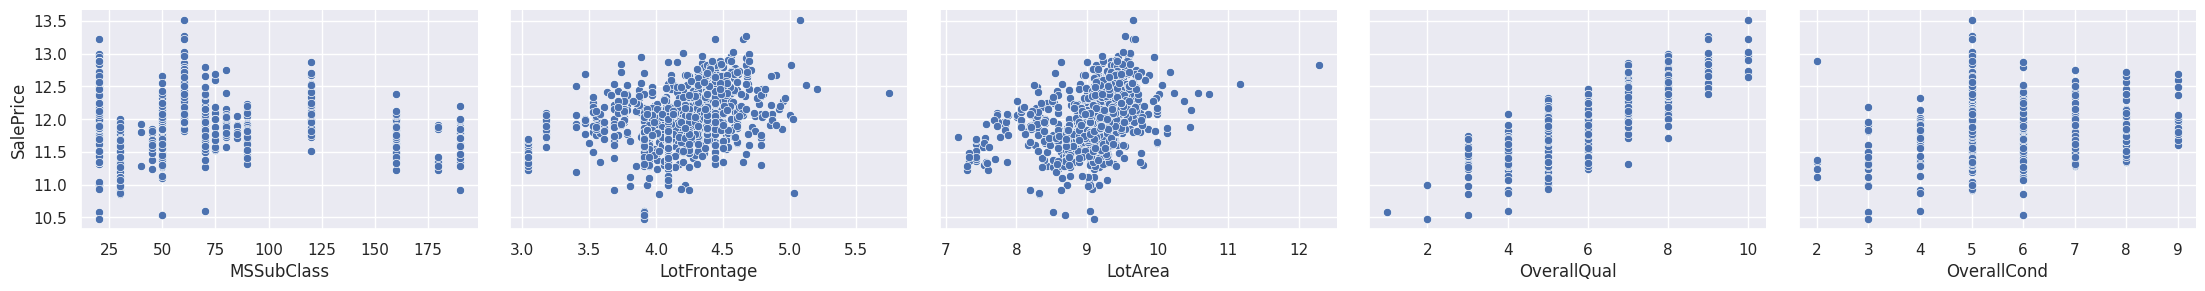

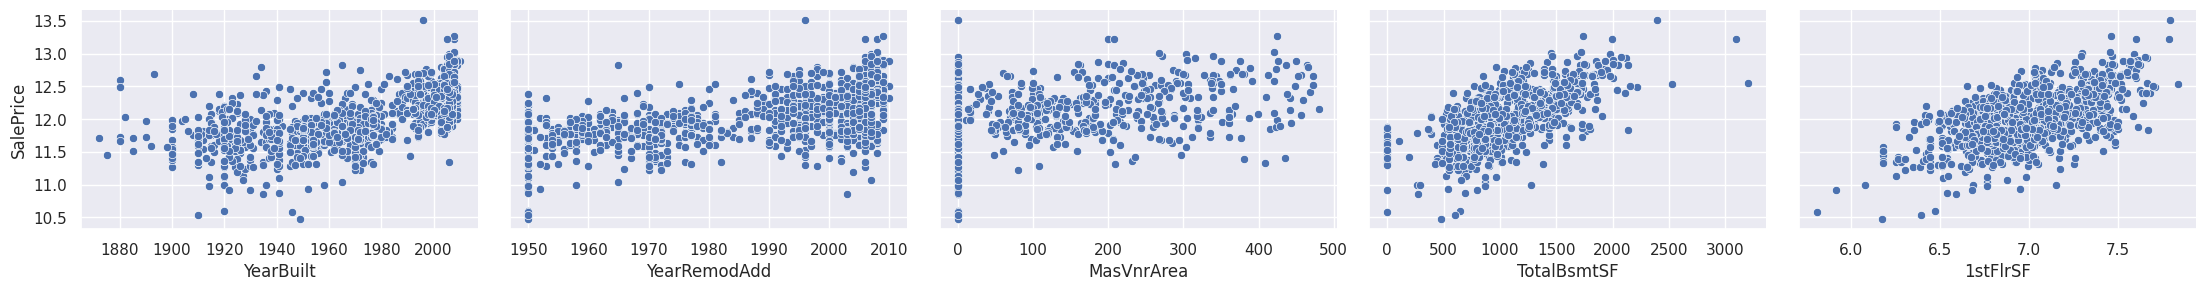

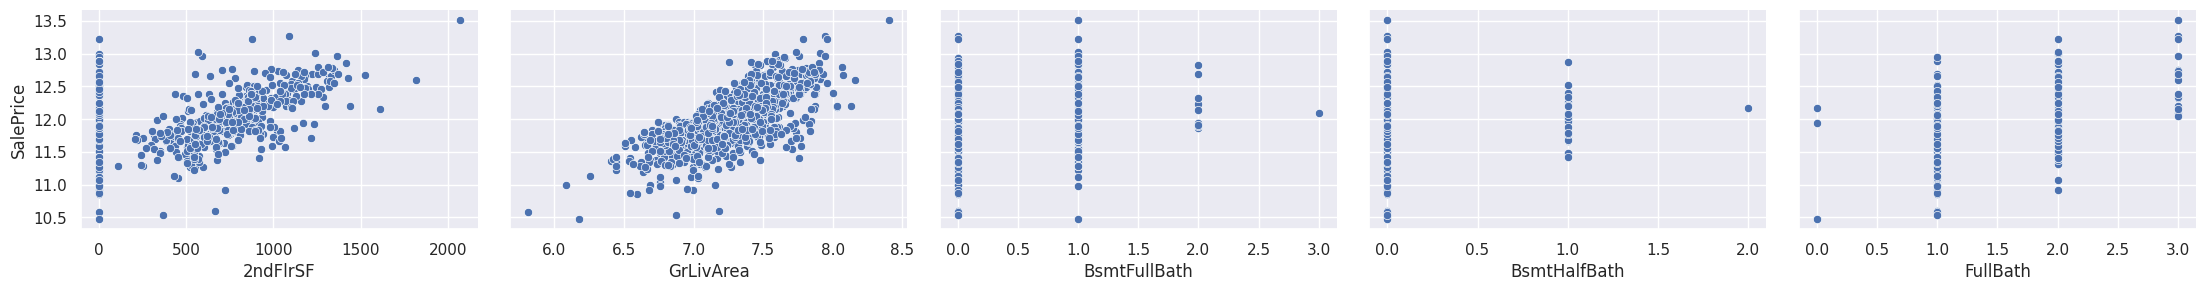

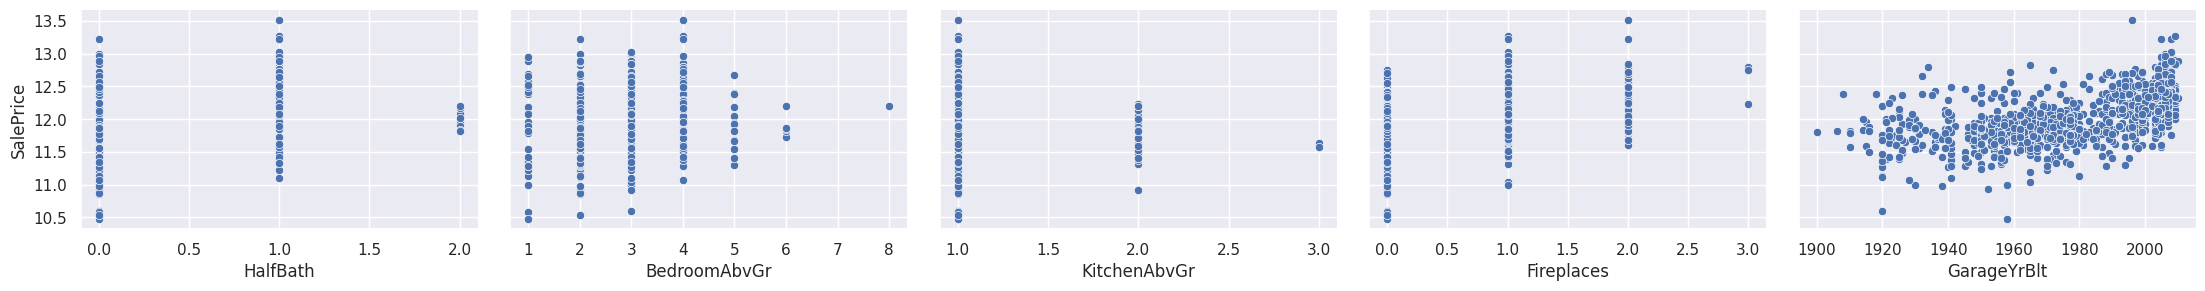

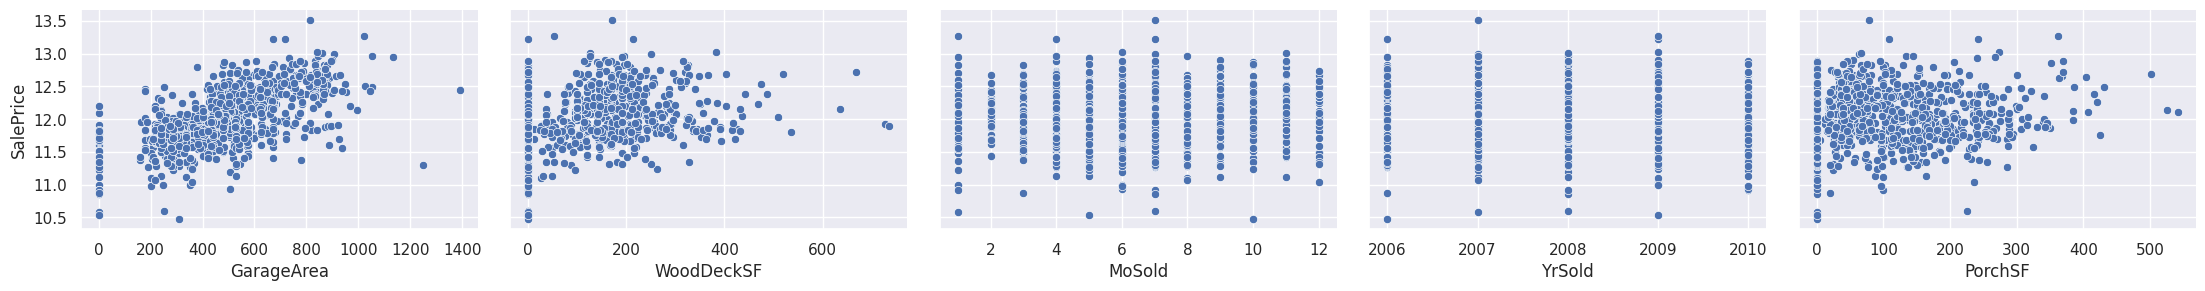

In [457]:
plotpair(df_iqr)

## Dropping CATEGORIAL values and filling

In [467]:
def print_cat_counts(df):
  for column_name in df.columns:
    if df[column_name].dtype == 'category':
      print(df[column_name].value_counts() / len(df))
      print()

In [465]:
#we need to remove empty values in categories if there are ones 
def cut_cats(df):
  for catcol in df.columns:
    if df[catcol].dtype == 'category':
      return df[catcol].cat.remove_unused_categories() 

In [473]:
def create_mt_catcol(df_new):
  df = df_new.copy()
  for col in df.columns:
      if df[col].dtype == 'category':
        if df[col].isna().any():
          df[col] = df[col].cat.add_categories(['MISSING'])
          df[col] = df[col].fillna('MISSING')
  cut_cats(df)
  return df

In [476]:
def many_boxplots(df):
  for col in df.columns:
    if col != 'SalePrice' and df[col].dtype == 'category':
      data = pd.concat([df['SalePrice'], df[col]], axis=1)
      f, ax = plt.subplots(figsize=(4, 2))
      fig = sns.boxplot(x=col, y="SalePrice", data=data)

In [472]:
print_cat_counts(df_iqr)

RL         0.765432
RM         0.171076
FV         0.044092
RH         0.011464
C (all)    0.007937
Name: MSZoning, dtype: float64

Pave    0.995591
Grvl    0.004409
Name: Street, dtype: float64

Grvl    0.040564
Pave    0.030864
Name: Alley, dtype: float64

Reg    0.720459
IR1    0.255732
IR2    0.018519
IR3    0.005291
Name: LotShape, dtype: float64

Lvl    0.901235
Bnk    0.047619
HLS    0.037037
Low    0.014109
Name: LandContour, dtype: float64

AllPub    1.0
NoSeWa    0.0
Name: Utilities, dtype: float64

Inside     0.769841
Corner     0.164903
CulDSac    0.032628
FR2        0.029101
FR3        0.003527
Name: LotConfig, dtype: float64

Gtl    0.955026
Mod    0.040564
Sev    0.004409
Name: LandSlope, dtype: float64

NAmes      0.157848
CollgCr    0.110229
OldTown    0.093474
Edwards    0.077601
Somerst    0.062610
NridgHt    0.055556
BrkSide    0.044974
SawyerW    0.043210
Gilbert    0.043210
Sawyer     0.040564
NWAmes     0.037037
Crawfor    0.035273
Mitchel    0.031746
IDOTRR     

We will drop everyting that has more than 85% of data in one column
Drop Utilities, Condition1, Condition2, Street, LandContour, LandSlope, RoofMatl, ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive, SaleType, 

In [479]:
df_cats = df_iqr.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities', 'Condition1', \
                       'Condition2', 'Street', 'LandContour', 'LandSlope', \
                'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', \
                'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'], axis = 1)
df_cats = create_mt_catcol(df_cats)
df_cats.shape

(1134, 47)

<ipython-input-476-b547bda649eb>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(figsize=(4, 2))


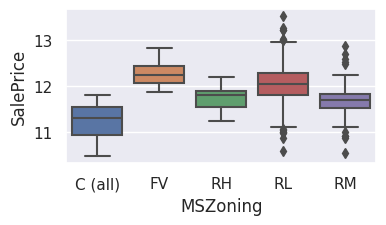

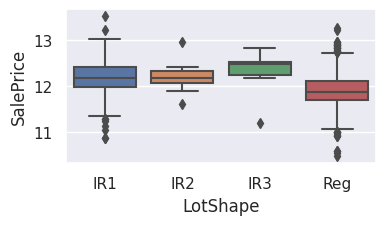

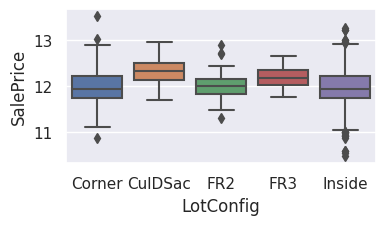

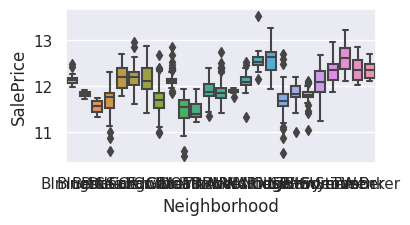

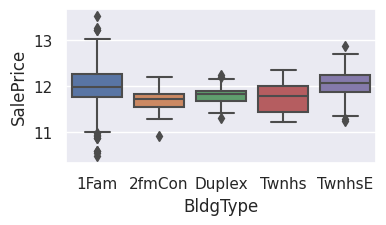

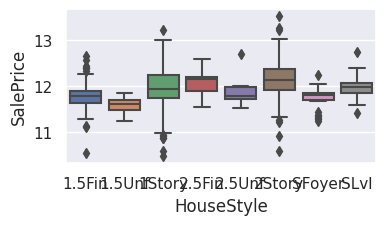

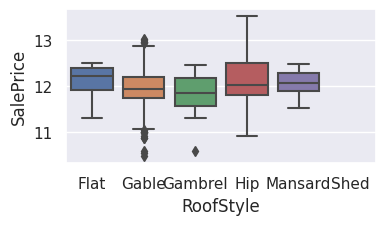

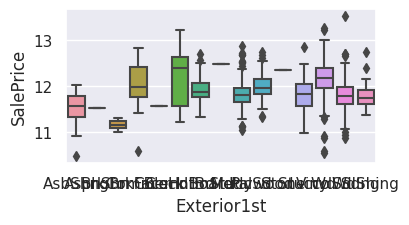

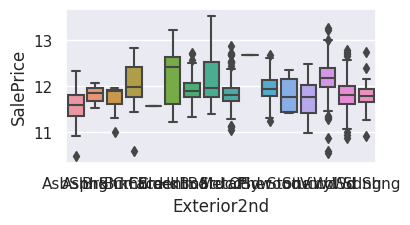

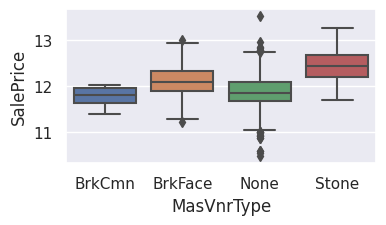

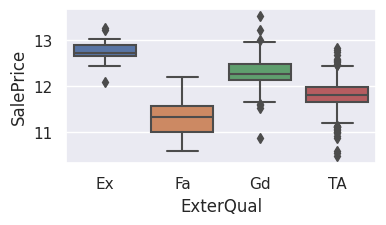

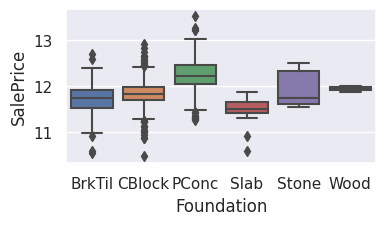

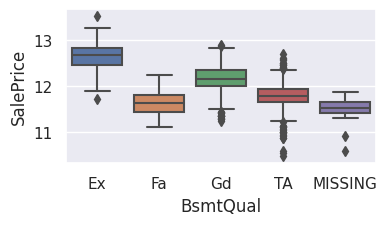

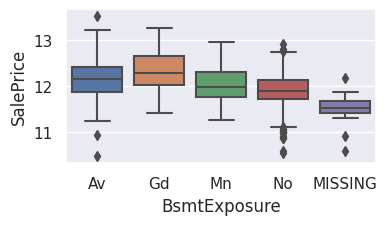

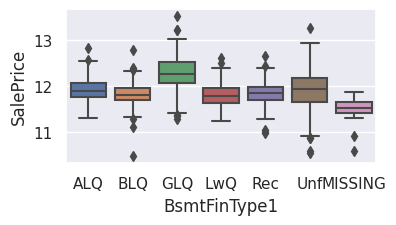

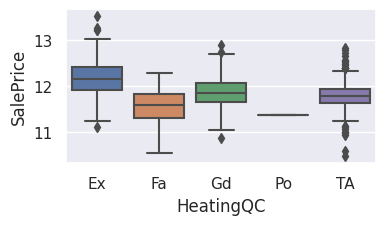

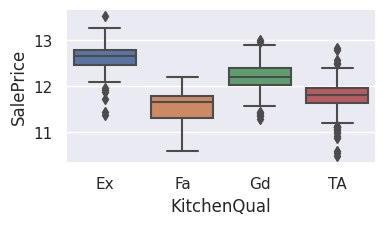

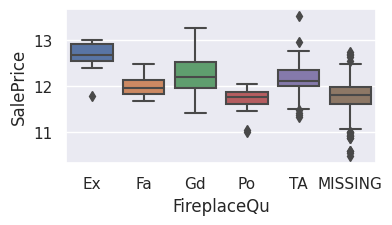

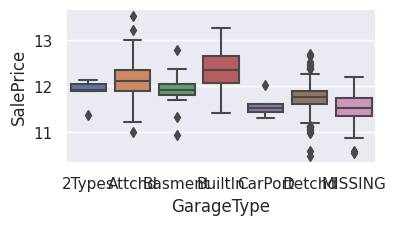

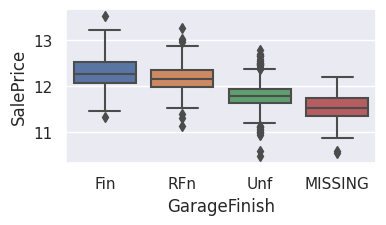

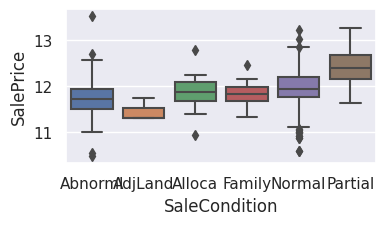

In [480]:
many_boxplots(df_cats)

## WARNING: Some columns now have None and Missing 

## Lets check the correlation matrix

In [483]:
df_corr = df_cats.copy()

In [220]:
def corellall(df):
  corrmatrix = df.corr()
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(corrmatrix, square=True, linewidth = 0.8, cmap = 'YlGnBu')
  return corrmatrix

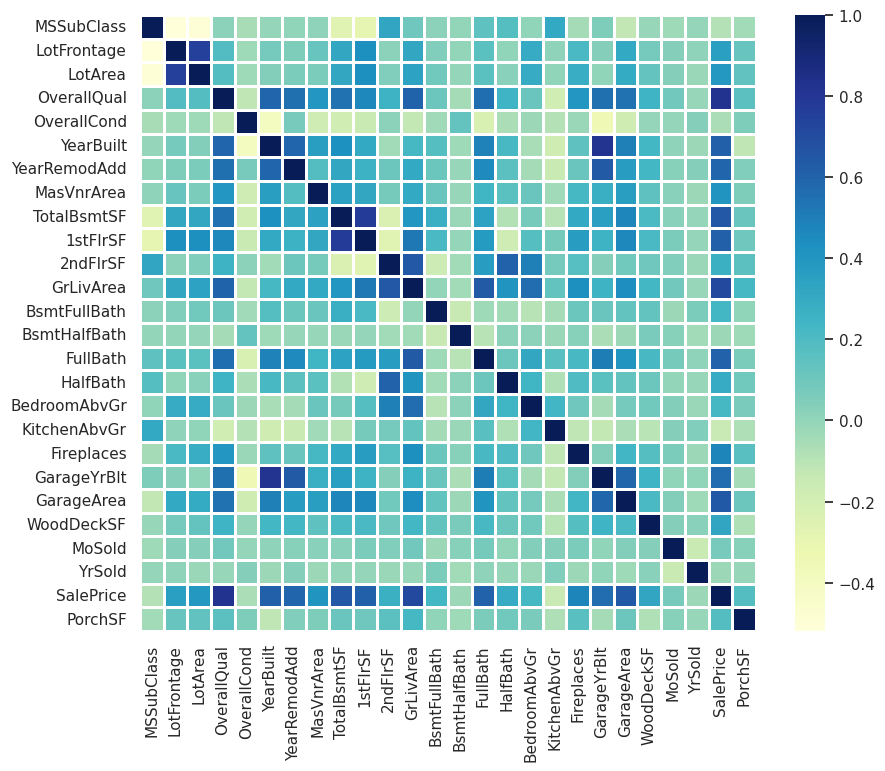

In [484]:
corrmatrix = corellall(df_corr)

Oh we see that some categories are definitelly correlated (white and orange)

In [482]:
def topcorr(df, param, positive = True, mostcorrelated_num = 12):
  if positive:
    cols = corellall(df).nlargest(mostcorrelated_num, param)[param].index
  else: 
    cols = corellall(df).nsmallest(mostcorrelated_num, param)[param].index
  cm = np.corrcoef(df[cols].values.T)
  sns.set(font_scale=1)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
  plt.show()

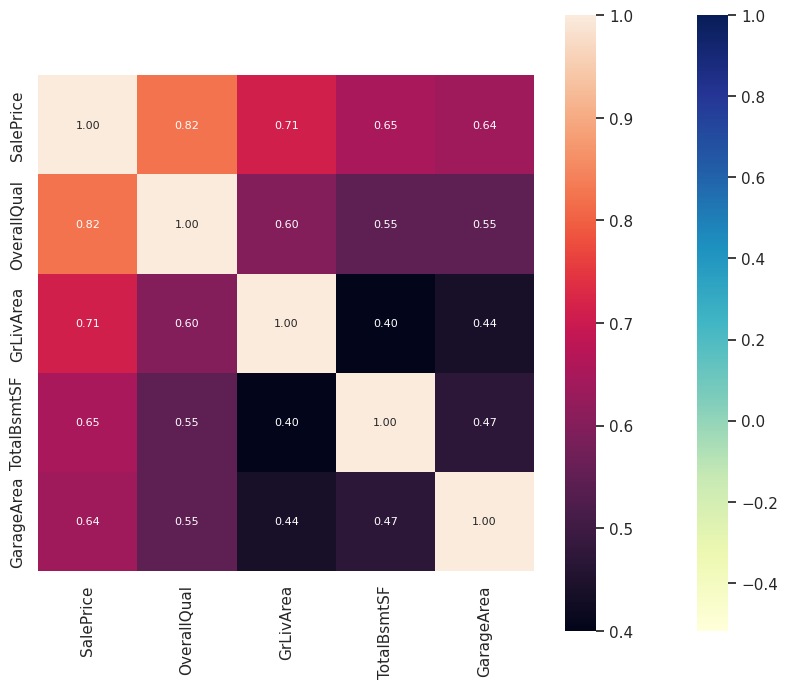

In [486]:
topcorr(df_corr, 'SalePrice', True,5)

In [224]:
def minmaxcor(df):
  for col in df.columns:
    if df[col].dtype != 'category':
      topcorr(df, col , True, 5)
      topcorr(df, col, False, 5)

In [225]:
#minmaxcor(df3)

Price is correlated with overal quality, GrLivArea, Garage size for cars, Year built and remodified

Garage area is correlated with Garage car size - DROP last one

TotalBsmtSF too correlated with 1stFlrSF 80% - Do not drop. Basement+1st floor+2nd floor

GrLivArea with TotRmsAbvGrd - drop TotRmsAbvGrd
Year bult is negativelly correlated with Overal condition